In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import matplotlib as plt
from torch.utils.data import DataLoader
from torch.optim import lr_scheduler
import matplotlib.pyplot as plt
from torch.optim.lr_scheduler import _LRScheduler

%run '/kaggle/input/icdar19-wsegs-cte-dataloader/CTE.ipynb'
%run '/kaggle/input/icdar19-wsegs-cte-dataloader/dataloader_ICDAR19_lsegs.ipynb'


import numpy as np
import os

torch.Size([1, 105])


In [2]:
class LabelSomCE(nn.Module):
	def __init__(self):
		super().__init__()

	def forward(self,x,target,smoothing=0.1):
		confidence = 1.0 - smoothing
		logprobs = F.log_softmax(x,dim=-1)
		nll_loss = - logprobs.gather(dim=-1,index=target.unsqueeze(1))
		nll_loss = nll_loss.squeeze(1)
		smooth_loss = -logprobs.mean(dim=-1)
		loss = confidence * nll_loss + smoothing * smooth_loss

		return loss.mean()

def download(folder,thetarfile):
    import urllib.request
    import tarfile
    ftpstream = urllib.request.urlopen(thetarfile)
    thetarfile = tarfile.open(fileobj=ftpstream, mode="r|gz")
    thetarfile.extractall(folder)
    thetarfile.close()

def download_cerug(folder):
    thetarfile = "https://www.ai.rug.nl/~sheng/writerset/CERUG-EN-train-images.tar.gz"
    download(folder,thetarfile)
    thetarfile = "https://www.ai.rug.nl/~sheng/writerset/CERUG-EN-test-images.tar.gz"
    download(folder,thetarfile)

def download_firemaker(folder):
    thetarfile = "https://www.ai.rug.nl/~sheng/writerset/Firemaker-train-images.tar.gz"
    download(folder,thetarfile)
    thetarfile = "https://www.ai.rug.nl/~sheng/writerset/Firemaker-test-images.tar.gz"
    download(folder,thetarfile)


ICDAR19_wsegsICDAR19_wsegswriter_index_table.pickle
----------
loading dataset /kaggle/input/iam-words-v2/IAM_words_segments with images: 80422
number of writer is: 657
-*-*-*-*-*-*-*-*-*-*
ICDAR19_wsegsICDAR19_wsegswriter_index_table.pickle
----------
loading dataset /kaggle/input/iam-words-v2/IAM_words_segments with images: 11235
number of writer is: 657
-*-*-*-*-*-*-*-*-*-*
Traing epoch: 0   avg loss is: 6.648544598375238
Testing epoch: 0   avg testing loss is: 4.1614888263800065
Validating on epoch: 0 has accuracy: top1: 28.43 top5: 50.76


/tmp/ipykernel_23/4035842509.py:133: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Validating on epoch: %d has accuracy: top1: %.2f top5: %.2f'%(epoch,top1*100,top5*100))
/tmp/ipykernel_23/4035842509.py:135: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  fp.write('Validating epoch %d accuracy is: top1: %.2f top5: %.2f\n'%(epoch,top1*100,top5*100))


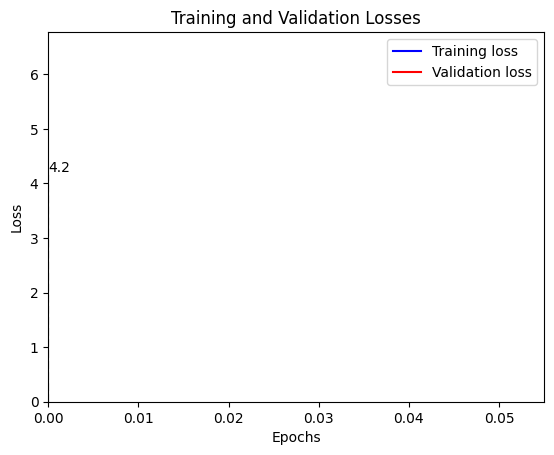

Traing epoch: 1   avg loss is: 3.8963744445858466
Testing epoch: 1   avg testing loss is: 3.334341984893994
Validating on epoch: 1 has accuracy: top1: 47.04 top5: 69.96


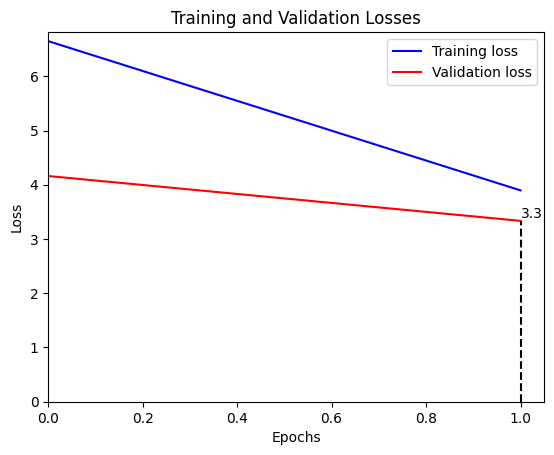

Traing epoch: 2   avg loss is: 3.2266731931306527
Testing epoch: 2   avg testing loss is: 3.1008374802927205
Validating on epoch: 2 has accuracy: top1: 52.02 top5: 75.33


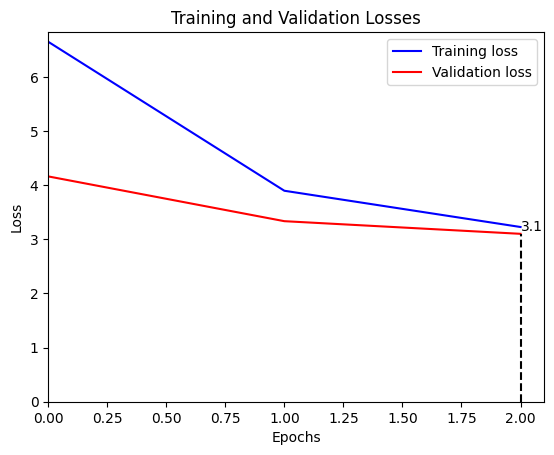

Traing epoch: 3   avg loss is: 2.856780971562393
Testing epoch: 3   avg testing loss is: 2.664332504631954
Validating on epoch: 3 has accuracy: top1: 63.00 top5: 83.17


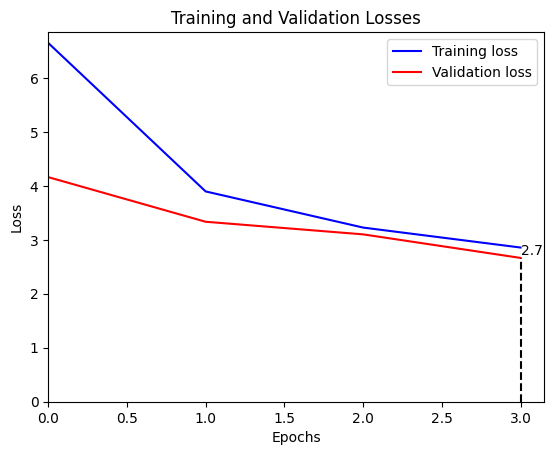

Traing epoch: 4   avg loss is: 2.606334340226067
Testing epoch: 4   avg testing loss is: 2.7337202191522416
Validating on epoch: 4 has accuracy: top1: 61.11 top5: 82.62


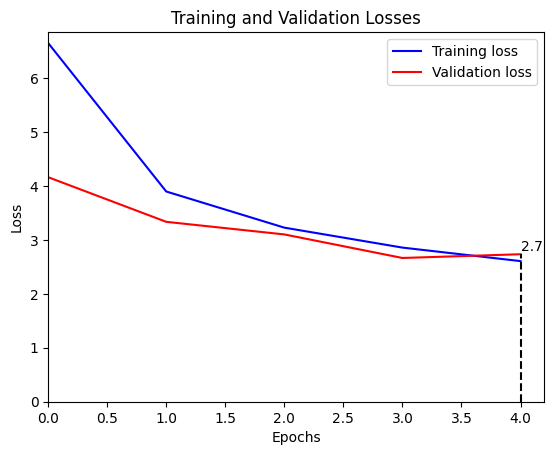

Traing epoch: 5   avg loss is: 2.42989494306748
Testing epoch: 5   avg testing loss is: 2.3804812948530802
Validating on epoch: 5 has accuracy: top1: 70.69 top5: 87.73


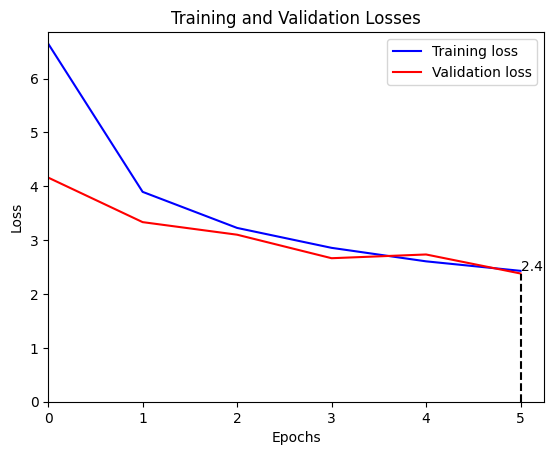

Traing epoch: 6   avg loss is: 2.2858700702923778
Testing epoch: 6   avg testing loss is: 2.2558662367409696
Validating on epoch: 6 has accuracy: top1: 74.05 top5: 88.66


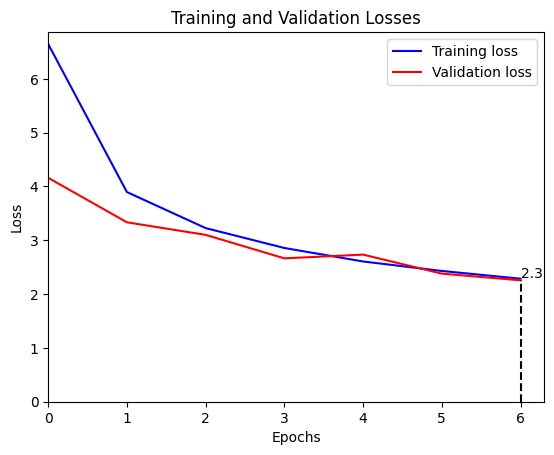

Traing epoch: 7   avg loss is: 2.180758284066144
Testing epoch: 7   avg testing loss is: 2.1582461061382703
Validating on epoch: 7 has accuracy: top1: 76.61 top5: 89.74


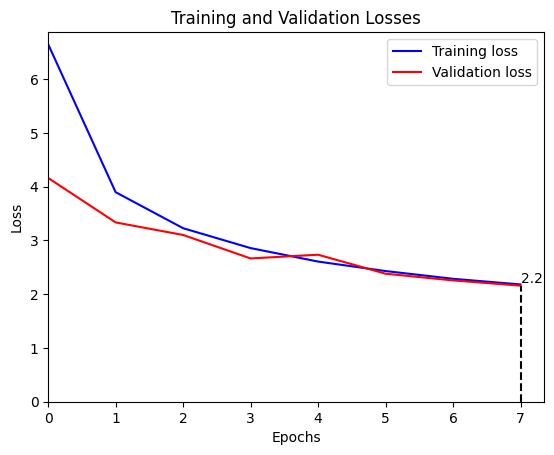

Traing epoch: 8   avg loss is: 2.082921039498379
Testing epoch: 8   avg testing loss is: 2.070091173625094
Validating on epoch: 8 has accuracy: top1: 79.17 top5: 91.12


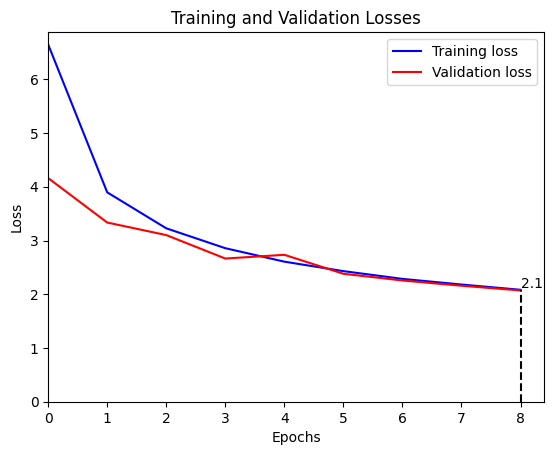

Traing epoch: 9   avg loss is: 2.0077548478164857
Testing epoch: 9   avg testing loss is: 2.051434611019335
Validating on epoch: 9 has accuracy: top1: 79.20 top5: 91.38


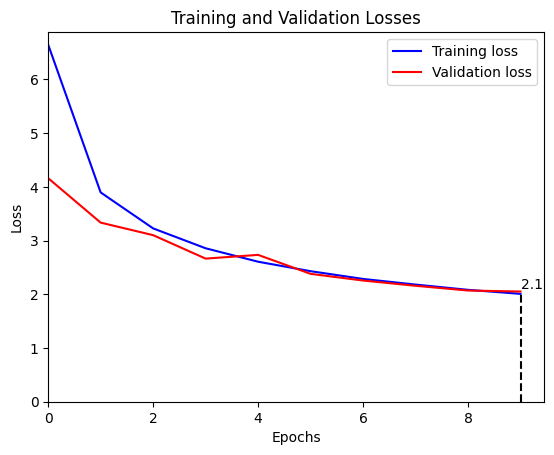

Traing epoch: 10   avg loss is: 1.789415247616804
Testing epoch: 10   avg testing loss is: 1.8454066052036637
Validating on epoch: 10 has accuracy: top1: 84.72 top5: 93.08


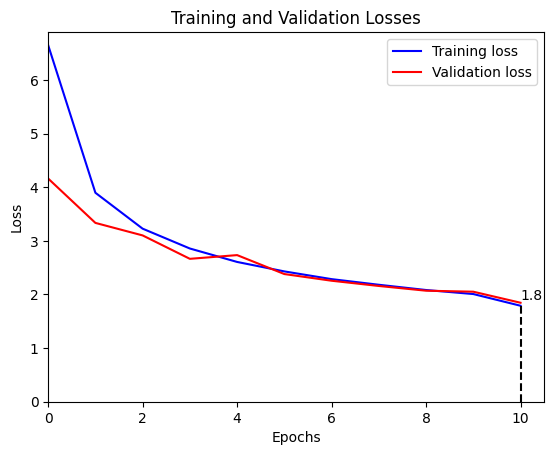

Traing epoch: 11   avg loss is: 1.7290255168591464
Testing epoch: 11   avg testing loss is: 1.8394769631951495
Validating on epoch: 11 has accuracy: top1: 84.75 top5: 93.33


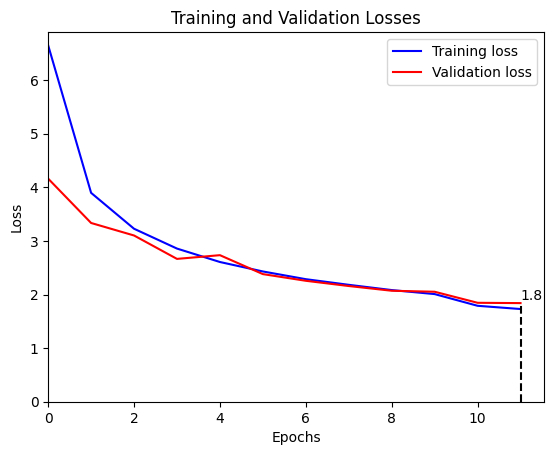

Traing epoch: 12   avg loss is: 1.6888443280679981
Testing epoch: 12   avg testing loss is: 1.807539447951283
Validating on epoch: 12 has accuracy: top1: 85.22 top5: 93.57


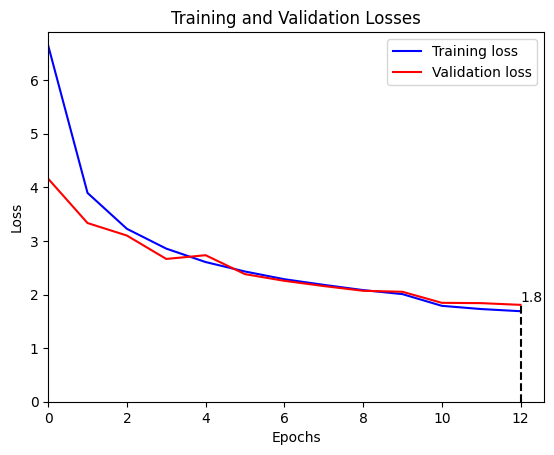

Traing epoch: 13   avg loss is: 1.6519091875250482
Testing epoch: 13   avg testing loss is: 1.7982192699125787
Validating on epoch: 13 has accuracy: top1: 85.38 top5: 93.62


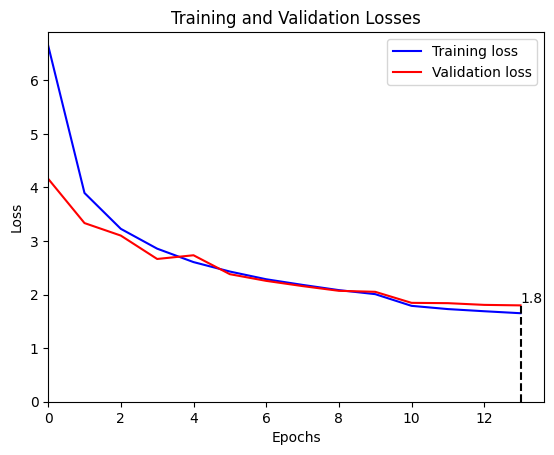

Traing epoch: 14   avg loss is: 1.618970922820368
Testing epoch: 14   avg testing loss is: 1.7887310601908655
Validating on epoch: 14 has accuracy: top1: 85.68 top5: 93.65


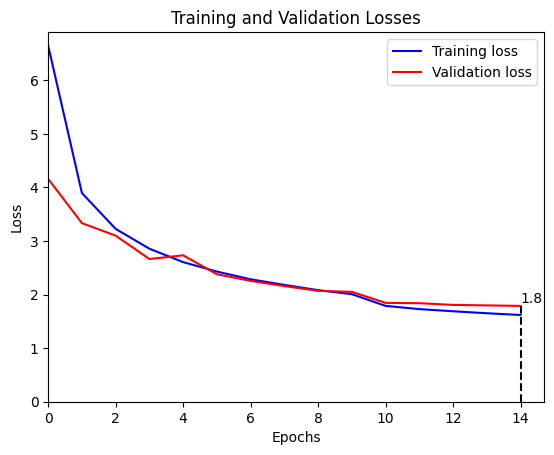

Traing epoch: 15   avg loss is: 1.5900869665513986
Testing epoch: 15   avg testing loss is: 1.769902098738452
Validating on epoch: 15 has accuracy: top1: 86.23 top5: 93.64


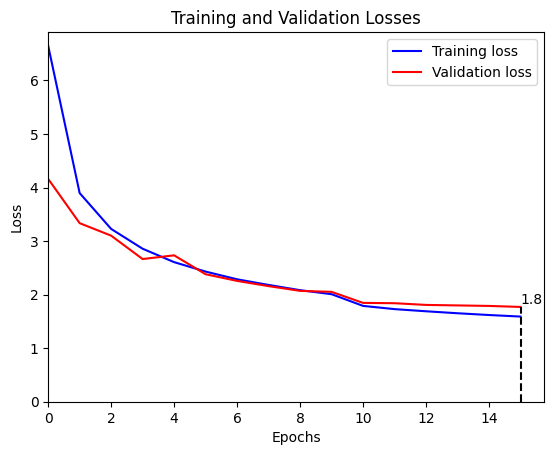

Traing epoch: 16   avg loss is: 1.5585212847933179
Testing epoch: 16   avg testing loss is: 1.7803018369511894
Validating on epoch: 16 has accuracy: top1: 85.73 top5: 93.64


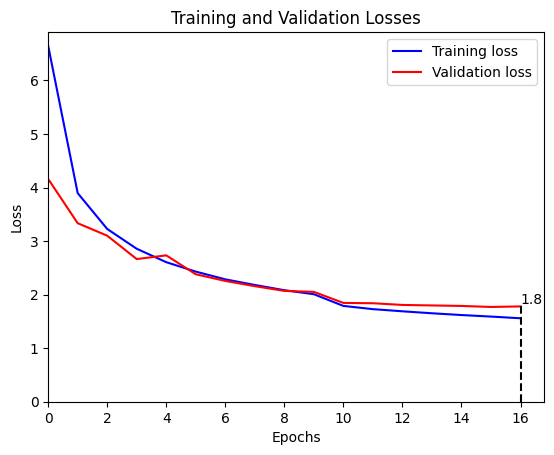

Traing epoch: 17   avg loss is: 1.532261236108635
Testing epoch: 17   avg testing loss is: 1.7726391982896568
Validating on epoch: 17 has accuracy: top1: 85.79 top5: 93.65


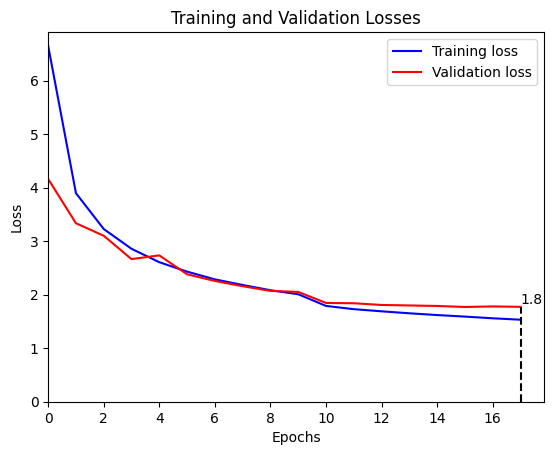

Traing epoch: 18   avg loss is: 1.5099067773849328
Testing epoch: 18   avg testing loss is: 1.7966305431227596
Validating on epoch: 18 has accuracy: top1: 85.31 top5: 93.11


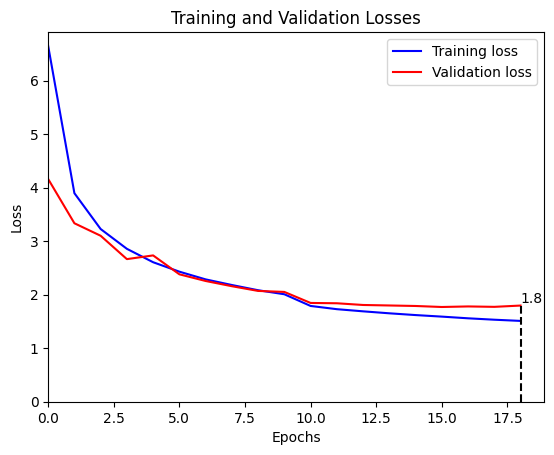

Traing epoch: 19   avg loss is: 1.480507836747919
Testing epoch: 19   avg testing loss is: 1.7418829256915096
Validating on epoch: 19 has accuracy: top1: 86.66 top5: 93.88


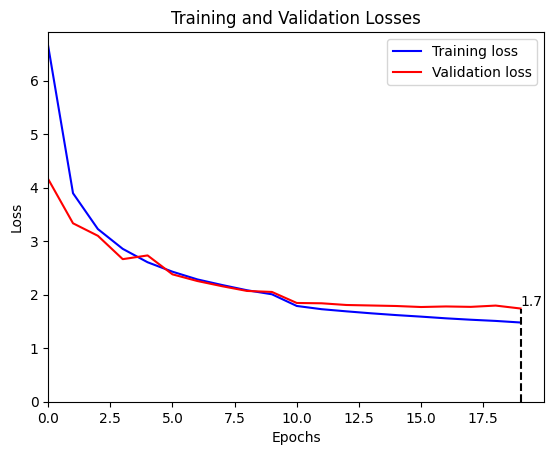

Traing epoch: 20   avg loss is: 1.376909083856134
Testing epoch: 20   avg testing loss is: 1.6947452085964372
Validating on epoch: 20 has accuracy: top1: 87.90 top5: 94.07


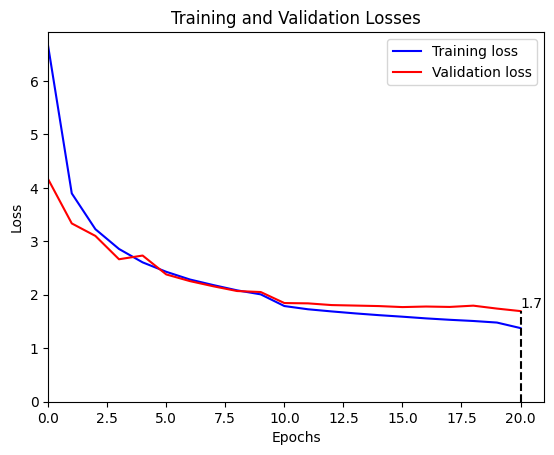

Traing epoch: 21   avg loss is: 1.3533765138310359
Testing epoch: 21   avg testing loss is: 1.677626022573555
Validating on epoch: 21 has accuracy: top1: 88.16 top5: 94.29


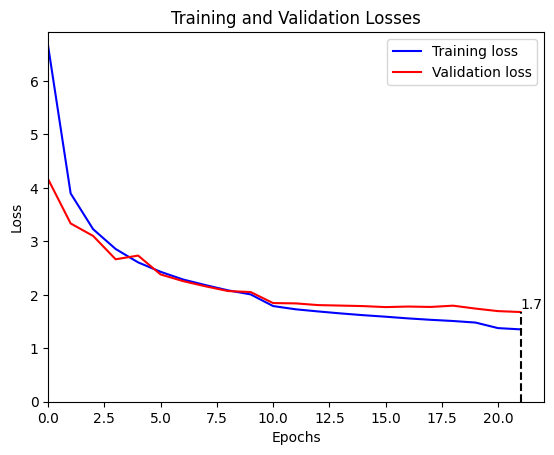

Traing epoch: 22   avg loss is: 1.333631913547159
Testing epoch: 22   avg testing loss is: 1.6848495656022984
Validating on epoch: 22 has accuracy: top1: 87.85 top5: 94.30


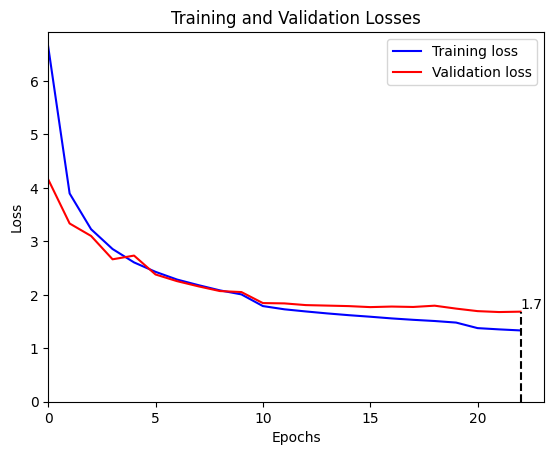

Traing epoch: 23   avg loss is: 1.3186012908039555
Testing epoch: 23   avg testing loss is: 1.692674983616065
Validating on epoch: 23 has accuracy: top1: 88.08 top5: 94.20


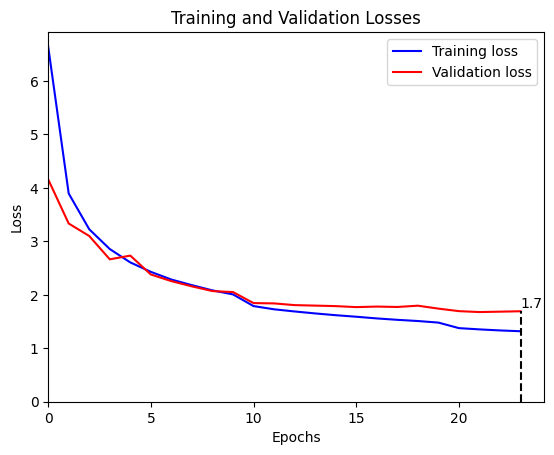

Traing epoch: 24   avg loss is: 1.3050042032910874
Testing epoch: 24   avg testing loss is: 1.689493634622772
Validating on epoch: 24 has accuracy: top1: 87.88 top5: 94.15


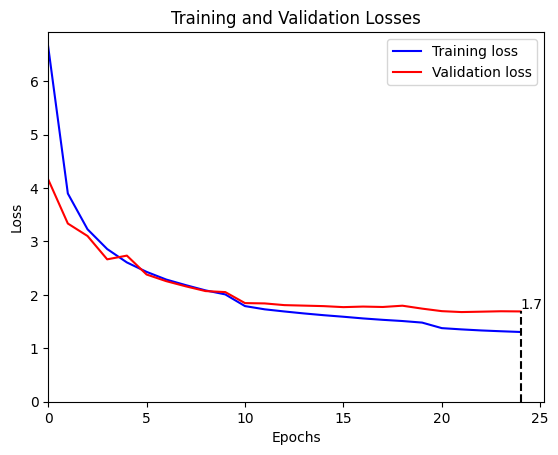

Traing epoch: 25   avg loss is: 1.2909286184183781
Testing epoch: 25   avg testing loss is: 1.707806869387457
Validating on epoch: 25 has accuracy: top1: 88.05 top5: 93.96


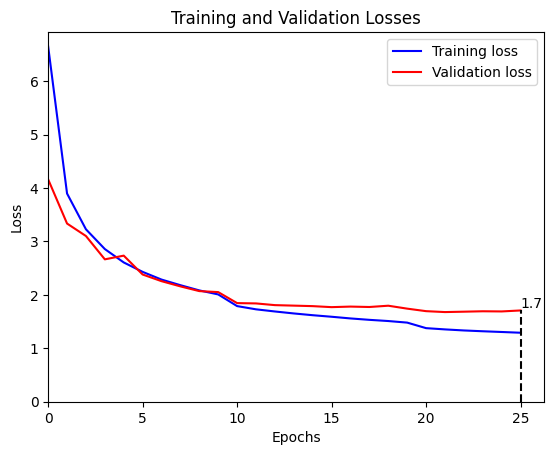

Traing epoch: 26   avg loss is: 1.2787106388174012
Testing epoch: 26   avg testing loss is: 1.7045240283521106
Validating on epoch: 26 has accuracy: top1: 87.99 top5: 94.00


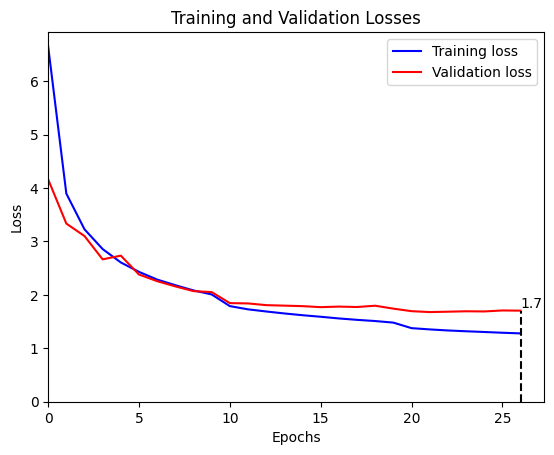

Traing epoch: 27   avg loss is: 1.267406923003373
Testing epoch: 27   avg testing loss is: 1.691329497531332
Validating on epoch: 27 has accuracy: top1: 87.98 top5: 94.17


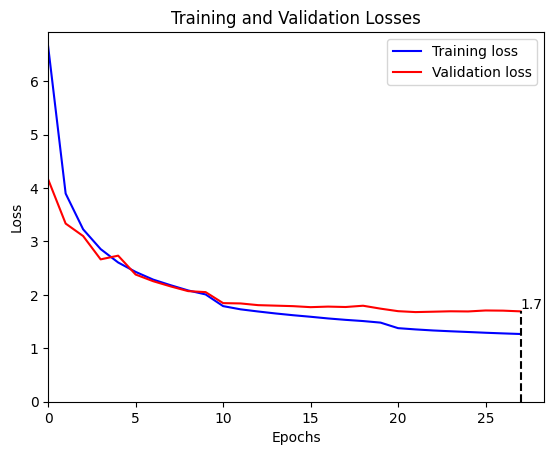

Traing epoch: 28   avg loss is: 1.2558089874438731
Testing epoch: 28   avg testing loss is: 1.6987955924626943
Validating on epoch: 28 has accuracy: top1: 87.96 top5: 93.89


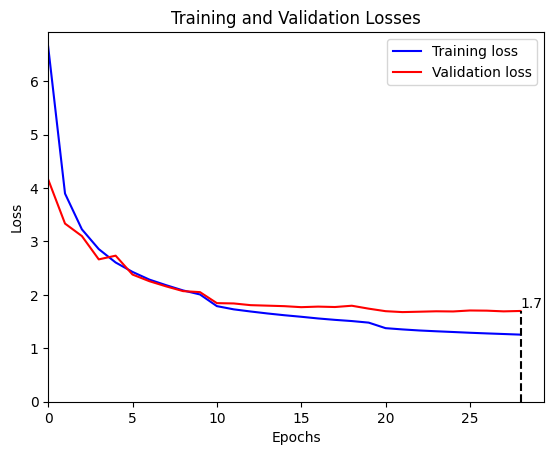

Traing epoch: 29   avg loss is: 1.2457495161939607
Testing epoch: 29   avg testing loss is: 1.7087075522071438
Validating on epoch: 29 has accuracy: top1: 87.80 top5: 93.92


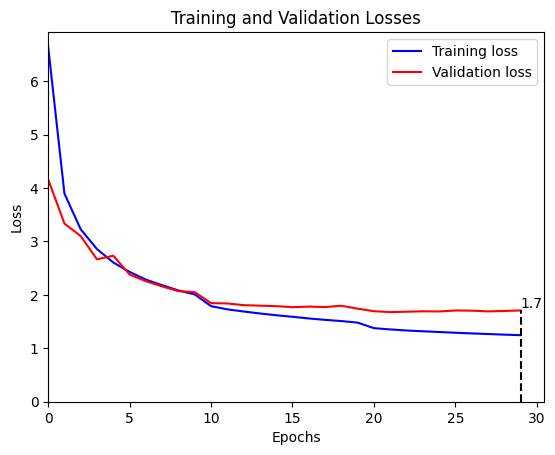

Traing epoch: 30   avg loss is: 1.2001335120893692
Testing epoch: 30   avg testing loss is: 1.6697713811570516
Validating on epoch: 30 has accuracy: top1: 88.50 top5: 94.19


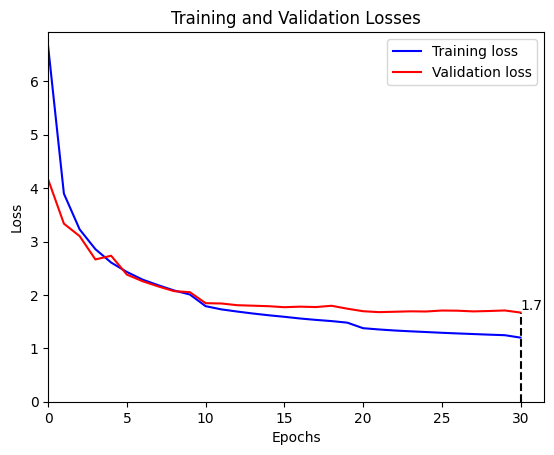

Traing epoch: 31   avg loss is: 1.1914553064252578
Testing epoch: 31   avg testing loss is: 1.6717424728453245
Validating on epoch: 31 has accuracy: top1: 88.22 top5: 94.09


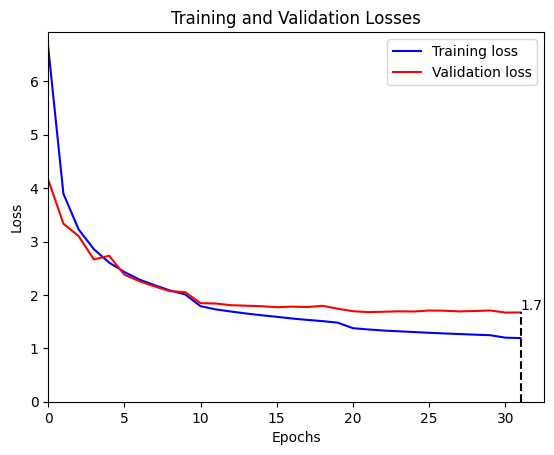

Traing epoch: 32   avg loss is: 1.1851041146924284
Testing epoch: 32   avg testing loss is: 1.6713699331324268
Validating on epoch: 32 has accuracy: top1: 88.37 top5: 94.15


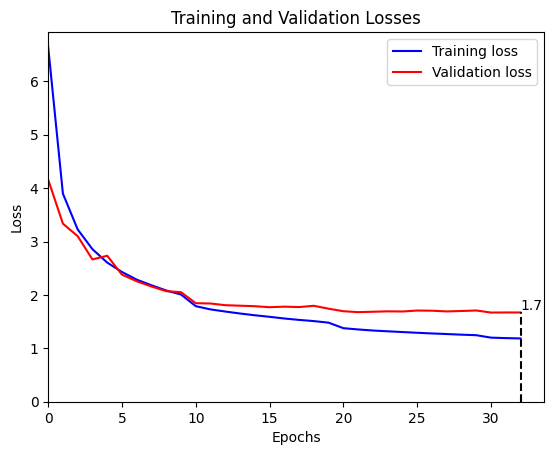

Traing epoch: 33   avg loss is: 1.1793000507629872
Testing epoch: 33   avg testing loss is: 1.6687022395018662
Validating on epoch: 33 has accuracy: top1: 88.74 top5: 94.22


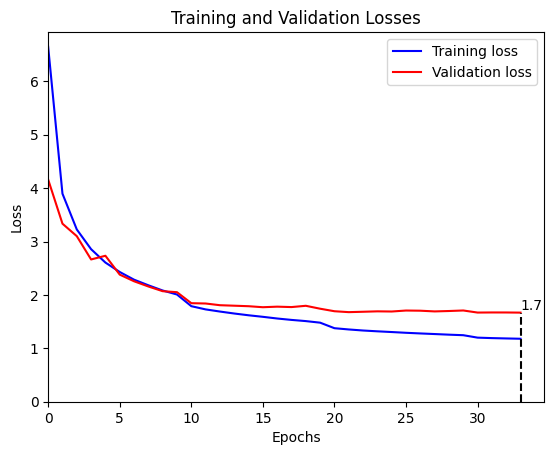

Traing epoch: 34   avg loss is: 1.1744089212447961
Testing epoch: 34   avg testing loss is: 1.674802382334876
Validating on epoch: 34 has accuracy: top1: 88.46 top5: 93.98


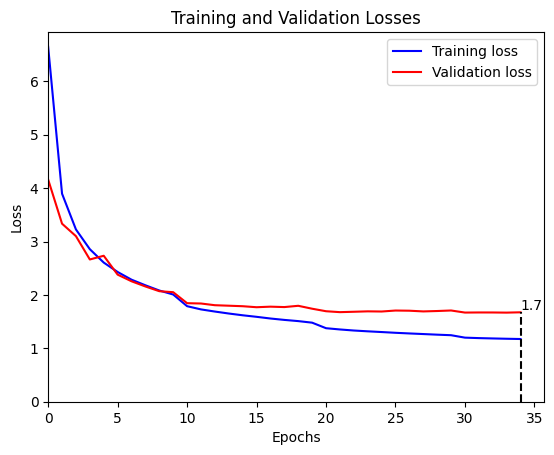

Traing epoch: 35   avg loss is: 1.169313861561922
Testing epoch: 35   avg testing loss is: 1.6687388437062205
Validating on epoch: 35 has accuracy: top1: 88.58 top5: 94.15


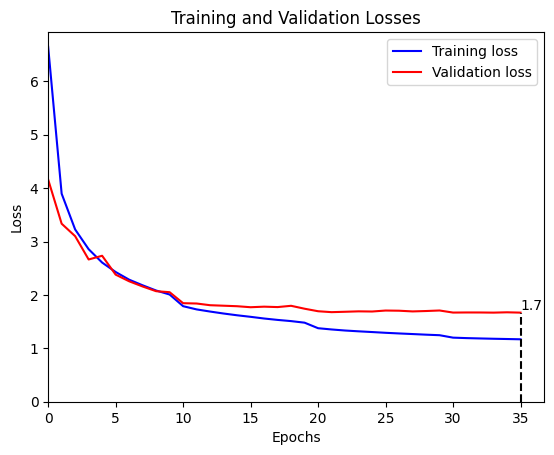

Traing epoch: 36   avg loss is: 1.165625384733395
Testing epoch: 36   avg testing loss is: 1.6620753940783048
Validating on epoch: 36 has accuracy: top1: 88.69 top5: 94.14


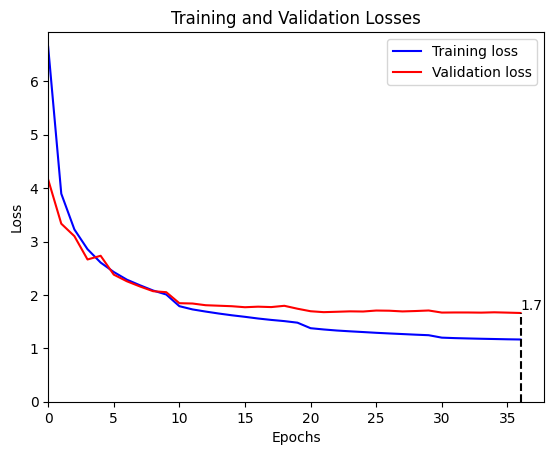

Traing epoch: 37   avg loss is: 1.1621137135919706
Testing epoch: 37   avg testing loss is: 1.671999402948328
Validating on epoch: 37 has accuracy: top1: 88.31 top5: 94.01


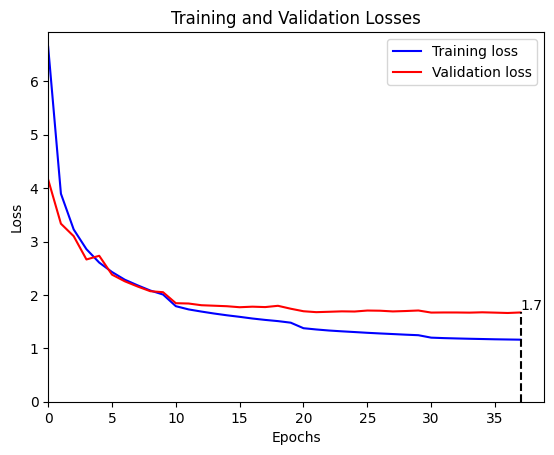

Traing epoch: 38   avg loss is: 1.158103951931569
Testing epoch: 38   avg testing loss is: 1.6651060435375142
Validating on epoch: 38 has accuracy: top1: 88.28 top5: 94.12


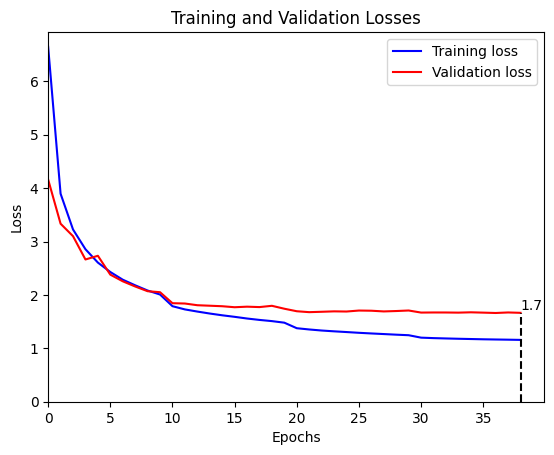

Traing epoch: 39   avg loss is: 1.1549224971871048
Testing epoch: 39   avg testing loss is: 1.669871845082572
Validating on epoch: 39 has accuracy: top1: 88.53 top5: 93.98


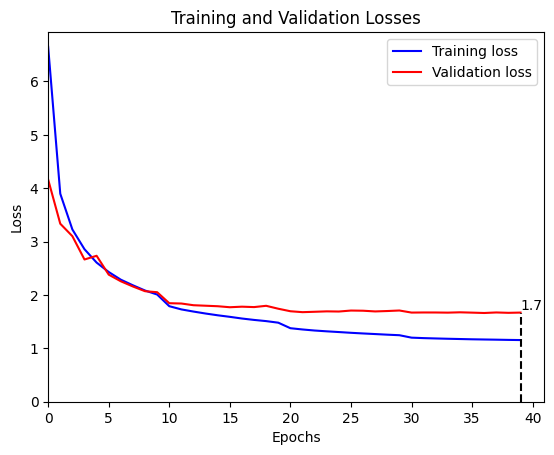

Traing epoch: 40   avg loss is: 1.1397534707984363
Testing epoch: 40   avg testing loss is: 1.6439259104844008
Validating on epoch: 40 has accuracy: top1: 88.69 top5: 94.31


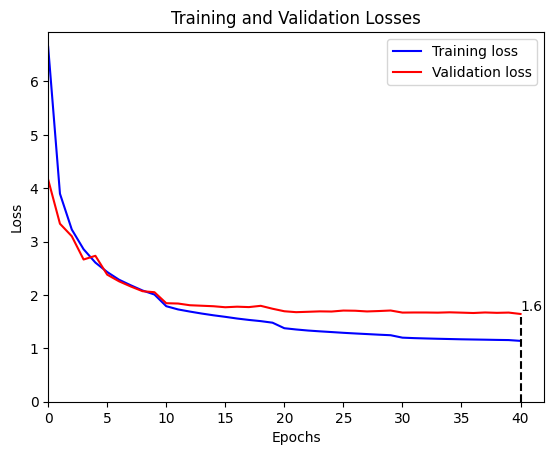

Traing epoch: 41   avg loss is: 1.1362131994604543
Testing epoch: 41   avg testing loss is: 1.6444143624936534
Validating on epoch: 41 has accuracy: top1: 88.62 top5: 94.21


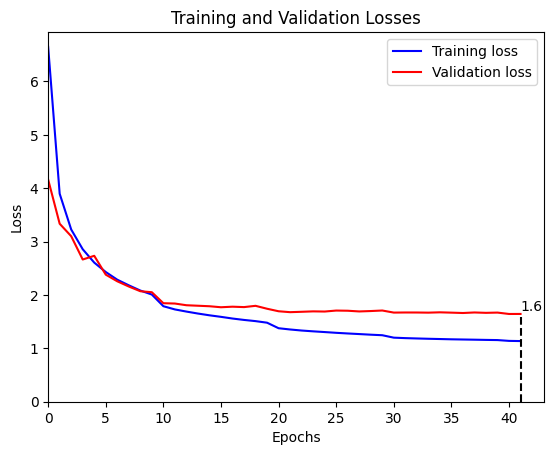

Traing epoch: 42   avg loss is: 1.1338411190336177
Testing epoch: 42   avg testing loss is: 1.6409922848385394
Validating on epoch: 42 has accuracy: top1: 88.85 top5: 94.17


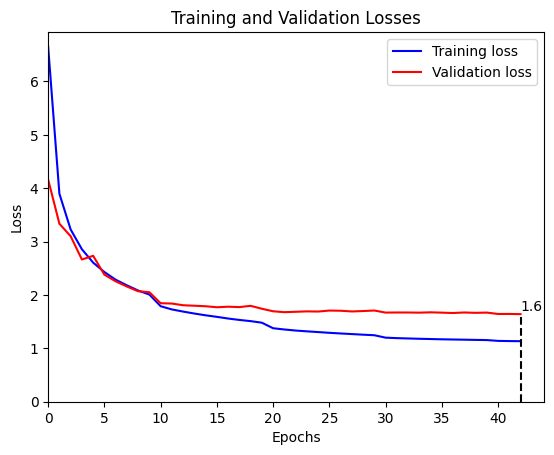

Traing epoch: 43   avg loss is: 1.1324210138943296
Testing epoch: 43   avg testing loss is: 1.6449411285042255
Validating on epoch: 43 has accuracy: top1: 88.74 top5: 94.21


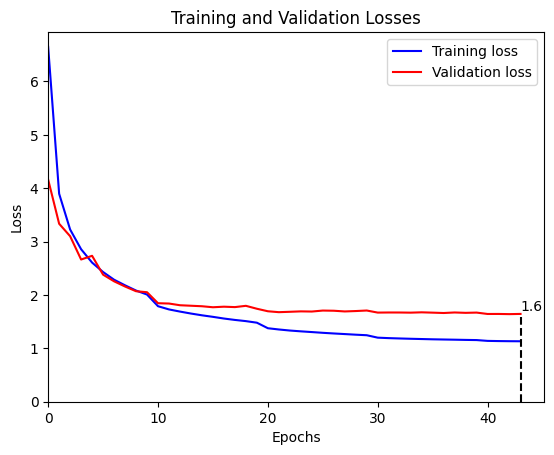

Traing epoch: 44   avg loss is: 1.1304932569916677
Testing epoch: 44   avg testing loss is: 1.6471020675146393
Validating on epoch: 44 has accuracy: top1: 88.79 top5: 94.21


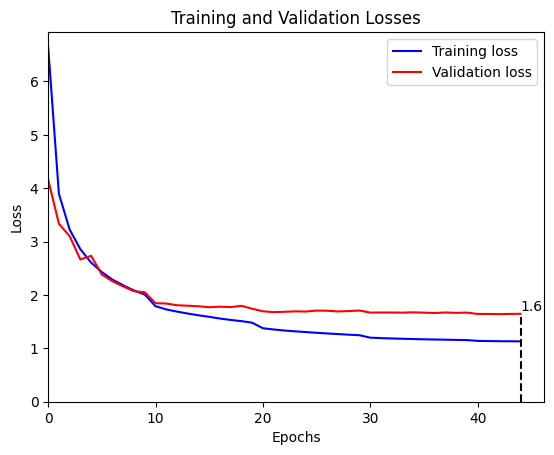

Traing epoch: 45   avg loss is: 1.128578229179147
Testing epoch: 45   avg testing loss is: 1.640925276330321
Validating on epoch: 45 has accuracy: top1: 88.85 top5: 94.09


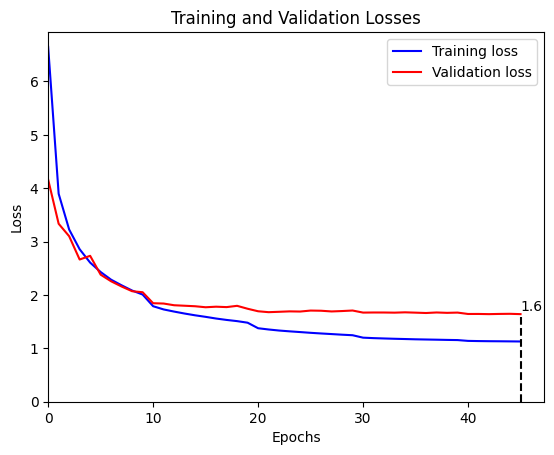

Traing epoch: 46   avg loss is: 1.1270907634622398
Testing epoch: 46   avg testing loss is: 1.64766613314535
Validating on epoch: 46 has accuracy: top1: 88.65 top5: 94.04


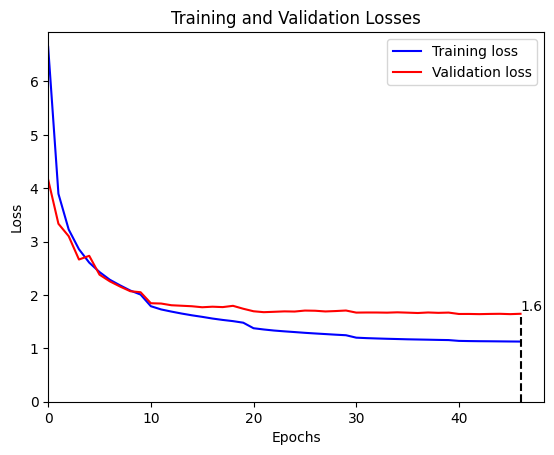

Traing epoch: 47   avg loss is: 1.1249746030846584
Testing epoch: 47   avg testing loss is: 1.6475864845522776
Validating on epoch: 47 has accuracy: top1: 88.68 top5: 93.91


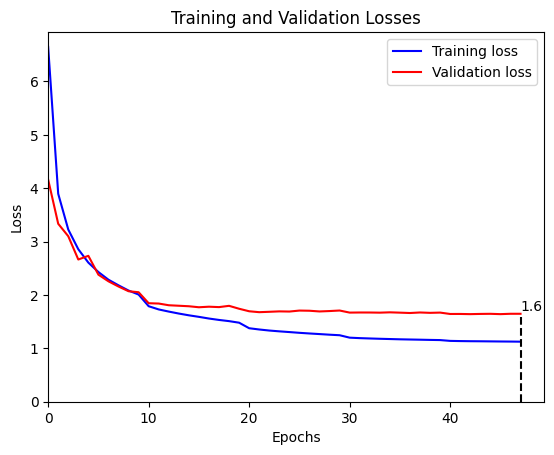

Traing epoch: 48   avg loss is: 1.1234176936872537
Testing epoch: 48   avg testing loss is: 1.6458421372417704
Validating on epoch: 48 has accuracy: top1: 88.62 top5: 94.02


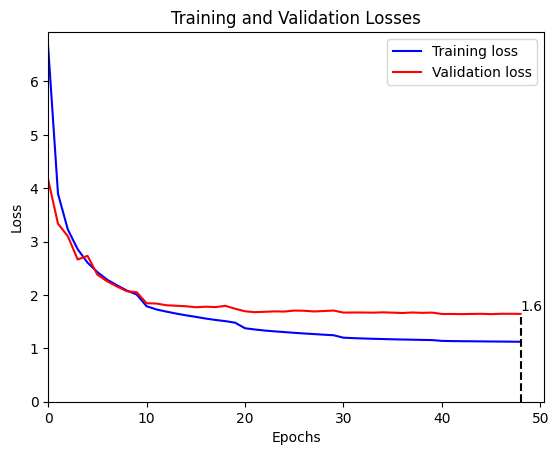

Traing epoch: 49   avg loss is: 1.1218258815365771
Testing epoch: 49   avg testing loss is: 1.6424816857021869
Validating on epoch: 49 has accuracy: top1: 88.62 top5: 94.04


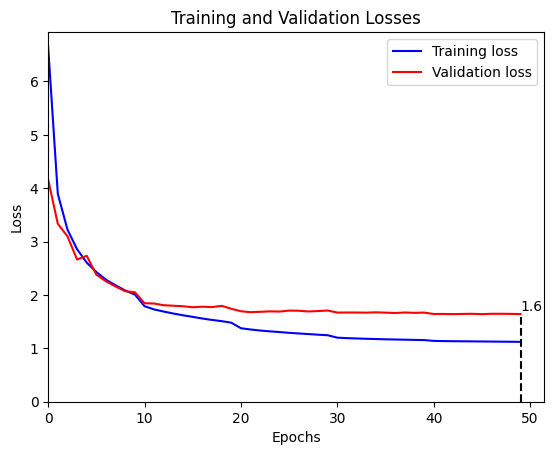

Traing epoch: 50   avg loss is: 1.1157004589395034
Testing epoch: 50   avg testing loss is: 1.6364961041834412
Validating on epoch: 50 has accuracy: top1: 88.79 top5: 94.12


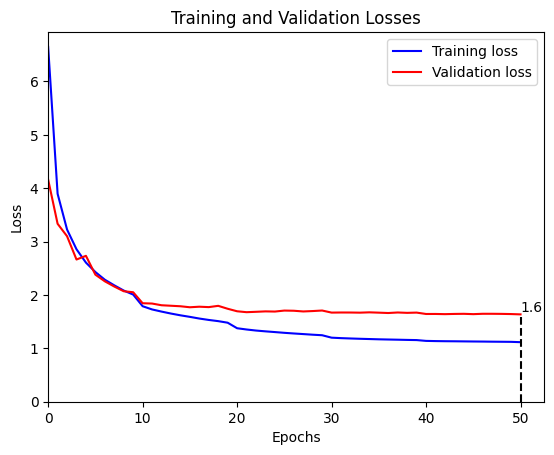

Traing epoch: 51   avg loss is: 1.114079479672166
Testing epoch: 51   avg testing loss is: 1.6373132089123787
Validating on epoch: 51 has accuracy: top1: 88.64 top5: 94.12


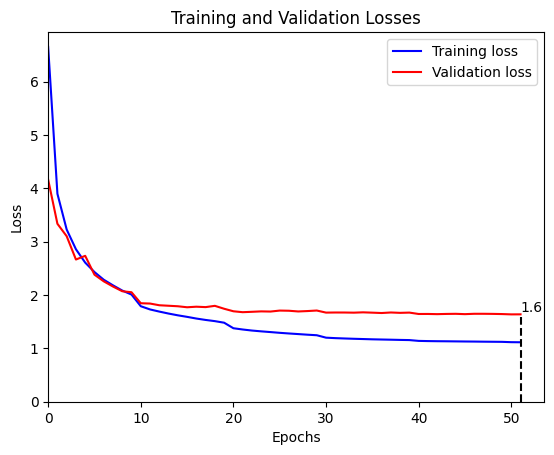

Traing epoch: 52   avg loss is: 1.1131903063098225
Testing epoch: 52   avg testing loss is: 1.636254511042306
Validating on epoch: 52 has accuracy: top1: 88.66 top5: 94.16


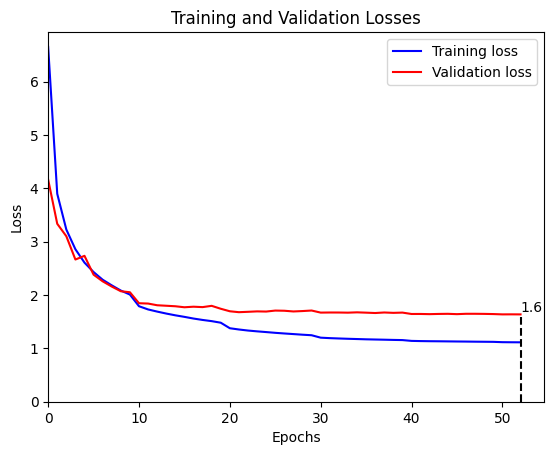

Traing epoch: 53   avg loss is: 1.1125985533888483
Testing epoch: 53   avg testing loss is: 1.6375327245948326
Validating on epoch: 53 has accuracy: top1: 88.85 top5: 94.18


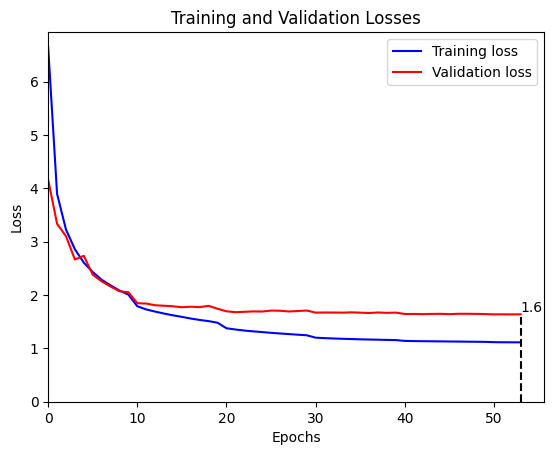

Traing epoch: 54   avg loss is: 1.111669191150043
Testing epoch: 54   avg testing loss is: 1.6358775334541353
Validating on epoch: 54 has accuracy: top1: 88.83 top5: 94.16


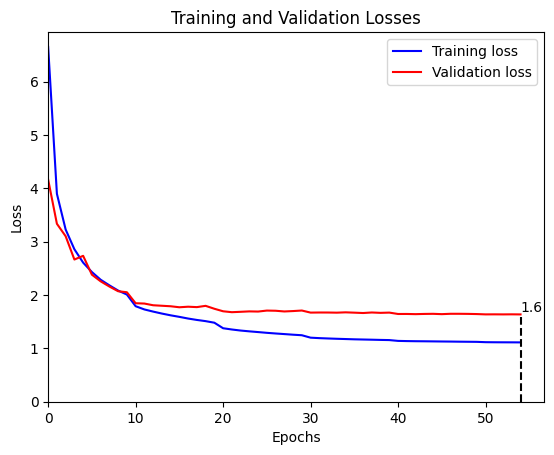

Traing epoch: 55   avg loss is: 1.1112792619044118
Testing epoch: 55   avg testing loss is: 1.6359762807998006
Validating on epoch: 55 has accuracy: top1: 88.67 top5: 94.09


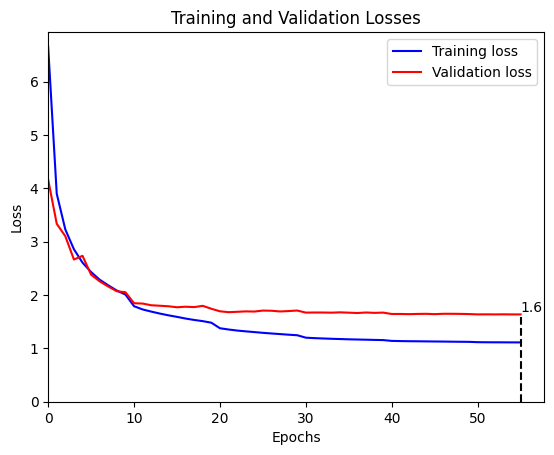

Traing epoch: 56   avg loss is: 1.1104732544546434
Testing epoch: 56   avg testing loss is: 1.6444164382275273
Validating on epoch: 56 has accuracy: top1: 88.77 top5: 93.98


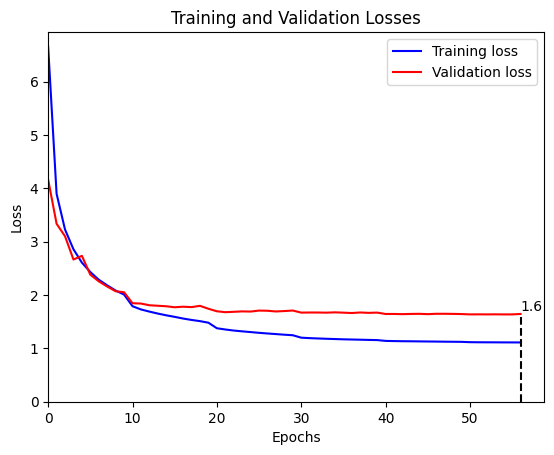

Traing epoch: 57   avg loss is: 1.108977139304465
Testing epoch: 57   avg testing loss is: 1.6372565197232438
Validating on epoch: 57 has accuracy: top1: 88.79 top5: 94.13


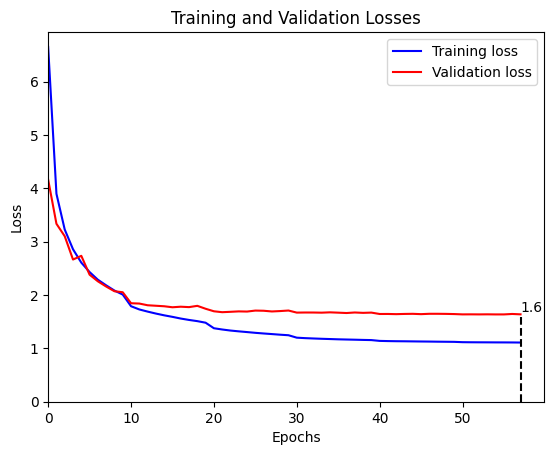

Traing epoch: 58   avg loss is: 1.108884341110521
Testing epoch: 58   avg testing loss is: 1.6378690175616724
Validating on epoch: 58 has accuracy: top1: 88.81 top5: 94.07


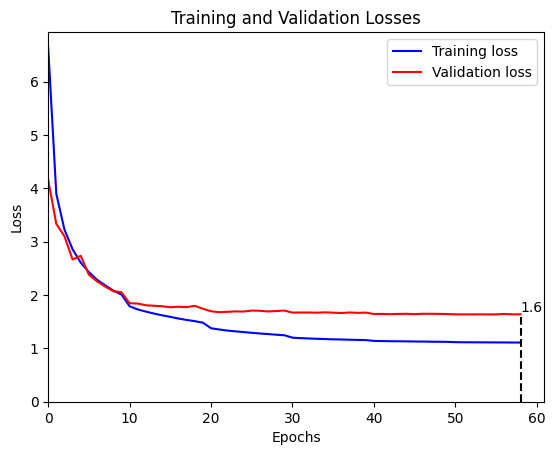

Traing epoch: 59   avg loss is: 1.1081042060138597
Testing epoch: 59   avg testing loss is: 1.6348779596610903
Validating on epoch: 59 has accuracy: top1: 88.79 top5: 94.19


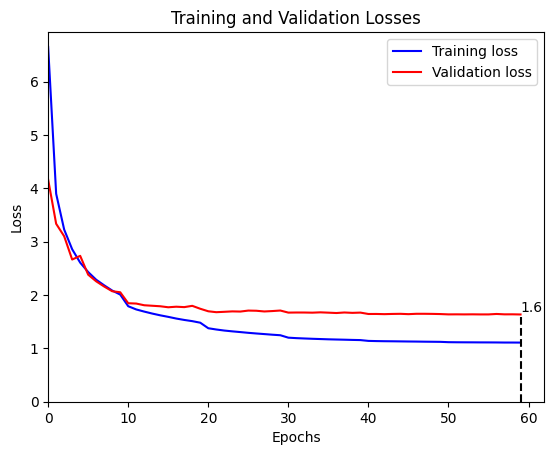

Traing epoch: 60   avg loss is: 1.1049887516846753
Testing epoch: 60   avg testing loss is: 1.6314652869915047
Validating on epoch: 60 has accuracy: top1: 88.82 top5: 94.07


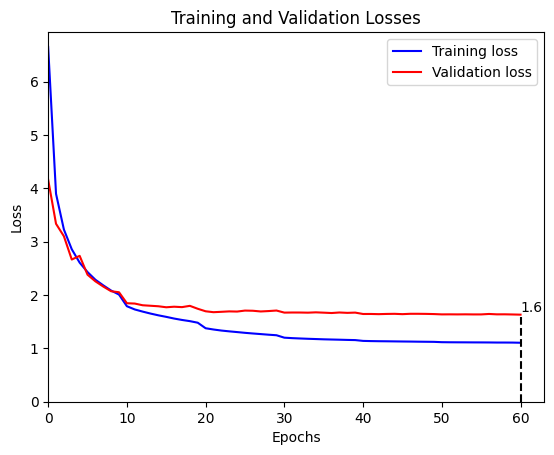

Traing epoch: 61   avg loss is: 1.1045370456757795
Testing epoch: 61   avg testing loss is: 1.6311961809228868
Validating on epoch: 61 has accuracy: top1: 88.81 top5: 94.05


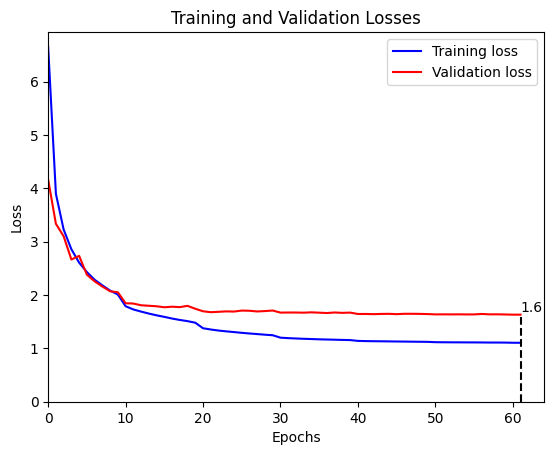

Traing epoch: 62   avg loss is: 1.1040303242002594
Testing epoch: 62   avg testing loss is: 1.6333561993255723
Validating on epoch: 62 has accuracy: top1: 88.80 top5: 94.08


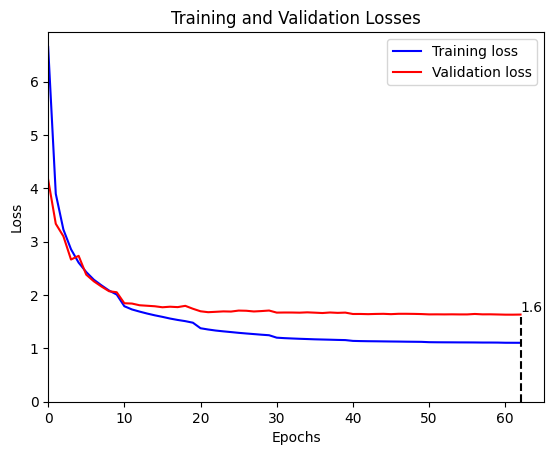

Traing epoch: 63   avg loss is: 1.1037932956688346
Testing epoch: 63   avg testing loss is: 1.6337224136545172
Validating on epoch: 63 has accuracy: top1: 88.89 top5: 94.02


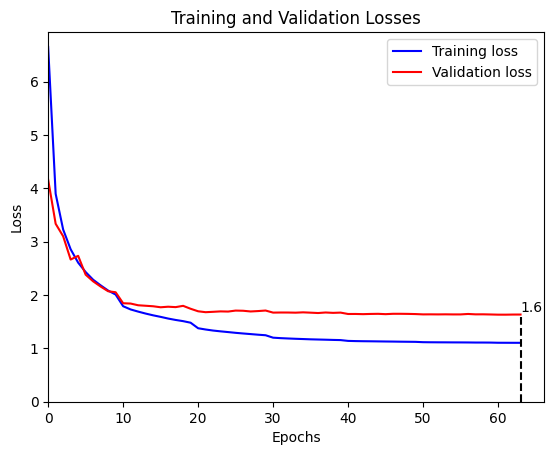

Traing epoch: 64   avg loss is: 1.103401199119574
Testing epoch: 64   avg testing loss is: 1.640174882679881
Validating on epoch: 64 has accuracy: top1: 88.87 top5: 94.03


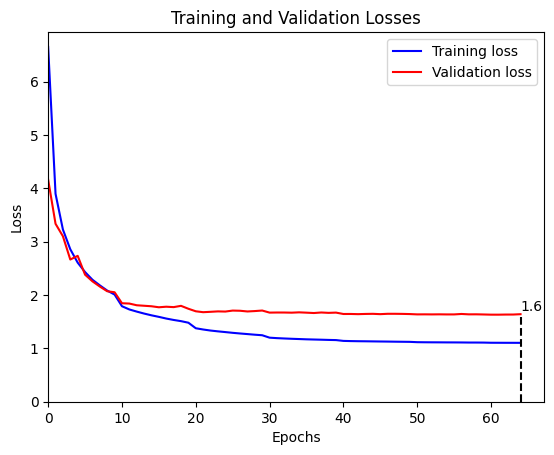

Traing epoch: 65   avg loss is: 1.102743749048337
Testing epoch: 65   avg testing loss is: 1.632271573180664
Validating on epoch: 65 has accuracy: top1: 88.81 top5: 94.05


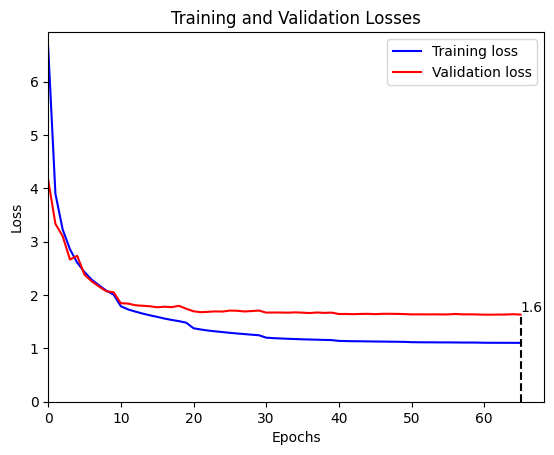

Traing epoch: 66   avg loss is: 1.102497735585153
Testing epoch: 66   avg testing loss is: 1.6331114440011774
Validating on epoch: 66 has accuracy: top1: 88.87 top5: 94.02


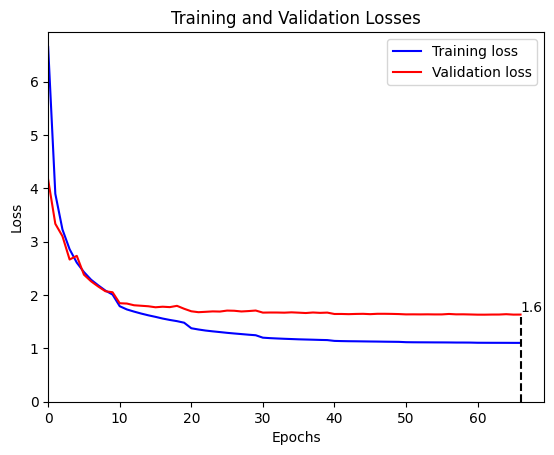

Traing epoch: 67   avg loss is: 1.1019604257554396
Testing epoch: 67   avg testing loss is: 1.6345871461404335
Validating on epoch: 67 has accuracy: top1: 88.87 top5: 94.10


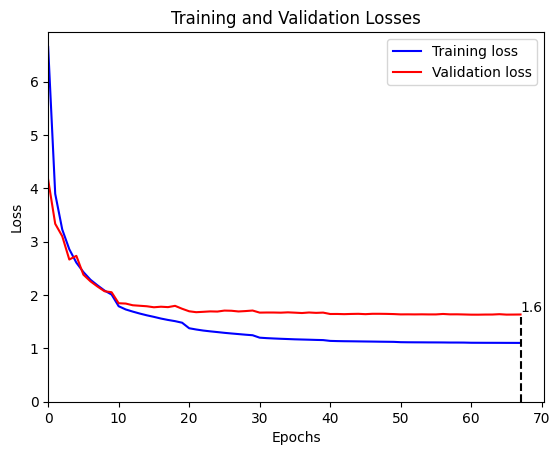

Traing epoch: 68   avg loss is: 1.1012368189164286
Testing epoch: 68   avg testing loss is: 1.6349953467272762
Validating on epoch: 68 has accuracy: top1: 88.73 top5: 94.03


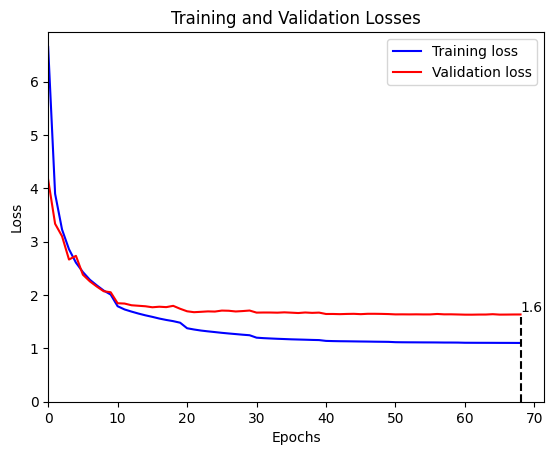

Traing epoch: 69   avg loss is: 1.1012813450566241
Testing epoch: 69   avg testing loss is: 1.6344845912195372
Validating on epoch: 69 has accuracy: top1: 88.95 top5: 94.05


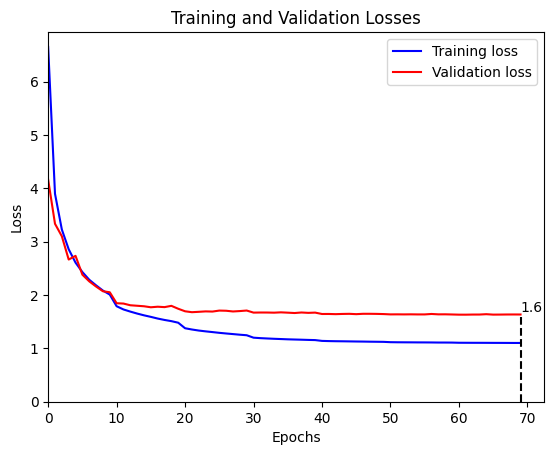

In [3]:
class DeepWriter_Train:
    def __init__(self,dataset='CERUG-EN',imgtype='png',mode='vertical'):

        self.dataset = dataset
        self.folder = dataset
        #self.labelfolder = 'dataset/'

        if not os.path.exists(self.folder):
            if dataset == 'CERUG-EN':
                download_cerug(dataset)
            elif dataset == 'Firemaker':
                download_firemaker(dataset)
            else:
                print('****** Warning: the dataset %s does not existed!******'%dataset)
                print('Please go to the following website to check how to download the dataset:')
                print('https://www.ai.rug.nl/~sheng/writeridataset.html')
                print('*'*20)
                raise ValueError('Dataset: %s does not existed!'%dataset)

        self.labelfolder = self.folder
        self.train_folder = self.folder+'/train/'
        self.test_folder = self.folder+'/test/'

        self.imgtype=imgtype
        self.mode = mode
        self.device = 'cuda'
        self.scale_size=(64,128)

        if self.device == 'cuda':
            torch.backends.cudnn.benchmark = True

        if self.dataset == 'CVL':
            self.imgtype = 'tif'

        self.model_dir = 'model'
        if not os.path.exists(self.model_dir):
            #raise ValueError('Model directory: %s does not existed'%self.model_dir)
            os.mkdir(self.model_dir)#raise ValueError('Model directory: %s does not existed'%self.model_dir)

        #basedir = 'GRRNN_WriterIdentification_dataset_'+self.dataset+'_model_'+self.mode+'_aug_16'
        basedir = 'CTE_IAM_model'+self.mode+'_aug_16'
        self.logfile= basedir + '.log'
        self.modelfile = basedir
        self.batch_size = 16

        train_set = DatasetFromFolder(dataset=self.dataset,
        				labelfolder = self.labelfolder,
                        foldername=self.train_folder,
                        imgtype=self.imgtype,
                        scale_size=self.scale_size,
                        is_training = True)

        self.training_data_loader = DataLoader(dataset=train_set, num_workers=2,
                           batch_size=self.batch_size, shuffle=True, drop_last=True)

        test_set = DatasetFromFolder(dataset=self.dataset,
        				labelfolder = self.labelfolder,
                        foldername=self.test_folder,imgtype=self.imgtype,
                        scale_size=self.scale_size,
                        is_training = False)

        self.testing_data_loader = DataLoader(dataset=test_set, num_workers=2,
                           batch_size=self.batch_size, shuffle=False)

        num_class = train_set.num_writer
        self.model = GrnnNet(1,num_classes=train_set.num_writer).to(self.device)

        #self.criterion = nn.CrossEntropyLoss()
        self.criterion = LabelSomCE()
        self.optimizer = optim.Adam(self.model.parameters(),lr=0.0001,weight_decay=1e-4)
        self.scheduler = lr_scheduler.StepLR(self.optimizer,step_size=10,gamma=0.5)


    def train(self,epoch):
        self.model.train()
        losstotal = []

        for iteration,batch in enumerate(self.training_data_loader,1):
            inputs = batch[0].to(self.device).float()
            target = batch[1].type(torch.long).to(self.device)

            self.optimizer.zero_grad()

            logits = self.model(inputs)

            train_loss= self.criterion(logits,target)

            losstotal.append(train_loss.item())
            train_loss.backward()
            self.optimizer.step()

        with open(self.logfile,'a') as fp:
            fp.write('Training epoch %d avg loss is: %.6f\n'%(epoch,np.mean(losstotal)))
        print('Traing epoch:',epoch,'  avg loss is:',np.mean(losstotal))


        return np.mean(losstotal)


    def test(self,epoch,during_train=True):
        self.model.eval()
        losstotal = []

        if not during_train:
            self.load_model(epoch)

        top1 = 0
        top5 = 0
        ntotal=0

        for iteration,batch in enumerate(self.testing_data_loader,1):
            inputs = batch[0].to(self.device).float()
            target = batch[1].to(self.device).long()

            logits = self.model(inputs)

            test_loss = self.criterion(logits,target)

            losstotal.append(test_loss.item())

            res = self.accuracy(logits,target,topk=(1,5))
            top1 += res[0]
            top5 += res[1]

            ntotal += inputs.size(0)



        top1 /= float(ntotal)
        top5 /= float(ntotal)

        print('Testing epoch:',epoch,'  avg testing loss is:',np.mean(losstotal))
        print('Validating on epoch: %d has accuracy: top1: %.2f top5: %.2f'%(epoch,top1*100,top5*100))
        with open(self.logfile,'a') as fp:
            fp.write('Validating epoch %d accuracy is: top1: %.2f top5: %.2f\n'%(epoch,top1*100,top5*100))

        return np.mean(losstotal)



    def check_exists(self,epoch):
        model_out_path = self.model_dir + '/' + self.modelfile + '-model_epoch_{}.pth'.format(epoch)
        return os.path.exists(model_out_path)

    def checkpoint(self,epoch):
        model_out_path = self.model_dir + '/' + self.modelfile + '-model_epoch_{}.pth'.format(epoch)
        torch.save(self.model.state_dict(),model_out_path)


    def load_model(self,epoch):
        model_out_path = self.model_dir + '/' + self.modelfile + '-model_epoch_{}.pth'.format(epoch)
        self.model.load_state_dict(torch.load(model_out_path,map_location=self.device))
        print('Load model successful')

    def plot_losses(self, training_losses, testing_losses):
        indices = range(len(training_losses))
        plt.plot(indices, training_losses, 'b', label='Training loss')
        plt.plot(indices, testing_losses, 'r', label='Validation loss')
        #
        plt.xlabel('Epochs')
        plt.ylabel('Loss')
        plt.legend()
        
        plt.xlim(left=0)
        plt.ylim(bottom=0)

        last_epoch = indices[-1]
        last_test_loss = testing_losses[-1]
        plt.plot([last_epoch, last_epoch], [0, last_test_loss], 'k--')
        plt.text(last_epoch, last_test_loss, f'{last_test_loss:.1f}', color='k', va='bottom', ha='left')
        plt.savefig("/kaggle/working/loss_plot.svg", format="svg", dpi=300)
        
        plt.title('Training and Validation Losses')

        plt.show()
        
        
    def train_loops(self,start_epoch,num_epoch):
        #if self.check_exists(num_epoch): return
        if start_epoch > 0:
            self.load_model(start_epoch-1)

        training_losses = []
        testing_losses = []

        for epoch in range(start_epoch,num_epoch):
            train_loss = self.train(epoch)
            training_losses.append(train_loss)
            self.checkpoint(epoch)
            test_loss = self.test(epoch)
            testing_losses.append(test_loss)
            self.scheduler.step()
            self.plot_losses(training_losses, testing_losses)


    def accuracy(self,output,target,topk=(1,)):
        with torch.no_grad():
            maxk = max(topk)
            _,pred = output.topk(maxk,1,True,True)
            pred = pred.t()
            correct = pred.eq(target.view(1, -1).expand_as(pred))

            res = []
            for k in topk:
                correct_k = correct[:k].reshape(-1).float().sum(0, keepdim=True)
                res.append(correct_k.data.cpu().numpy())

        return res





if __name__ == '__main__':

    modelist = ['vertical','horizontal']
    mode = modelist[1]

    mod = DeepWriter_Train(dataset='/kaggle/input/iam-words-v2/IAM_words_segments',mode=mode)
    mod.train_loops(0,70)